In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

The Standard scaler has been used for scaling the data

In [2]:
def plot_confusion(conf_matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()


In [3]:
def evaluate_test(model, x_test, y_test):
  y_pred = model.predict(x_test)
  result = model.evaluation(y_test,y_pred)
  return f'Accuracy on testing dataset: {result*100}%'


In [4]:
def normalization(X):#Min Max scaler is used for scaling the data
      mean = np.mean(X, axis=0, keepdims=1)
      std = np.std(X, axis=0, keepdims=1)
      X = (X - mean) / std
      return X

In [5]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [6]:
def plot(cost,title=None):
   x = [i for i in range(len(cost))]
   plt.plot(x,cost, label ='Cost function')
   plt.xlabel('Ittertion')
   plt.ylabel('Cost')
   plt.title(title)
   plt.legend()
   plt.show()

In [7]:
def plot_2D(y1,y2,x_lables=None,title=''):
   figure, axis = plt.subplots(2, figsize=(16,9))
   
   x1 = [i for i in range(len(y1))]
   x2 = [i for i in range(len(y2))]
   axis[0].plot(x1, y1,c='red')
   axis[0].set_title("Cost Function" + ' ' + title)
   axis[0].set_xlabel('Itteration')
   
   plt.subplots_adjust(wspace=0.4, hspace=0.4, left=0.1, right=0.9, top=0.9, bottom=0.1)
   
   axis[1].plot(x2, y2,c='green')
   axis[1].set_title("Accuracy Function" + ' ' + title)
   axis[1].set_xlabel('Itteration')

   plt.legend()
   plt.show()

In [8]:
class logistic_regression:
    def __init__(self, X, Y, add_intercept=True):
        features = X.shape[1]
        self.samples = X.shape[0]
        self.Y = Y
        self.add_intercept = add_intercept
        
        if add_intercept:
            self.W = np.zeros((1,features+1))
            self.X = np.append(X, np.ones((self.samples,1)), axis=1)
        else:
            self.W = np.zeros((1,features))
            self.X = X
        
    def fit(self, learning_rate=1e-3, iter=400):
        Cost = []
        Acc = []
        for i in range(iter):
            z = np.dot(self.W, self.X.T)
            result = sigmoid_activation(z)

            Y_t = self.Y.T
            cost = (-1/self.samples)*(np.sum((Y_t*np.log(result)) + ((1-Y_t)*(np.log(1-result)))))
            
            dw = (1/self.samples)*(np.dot(self.X.T, (result-Y_t).T))
            self.W = self.W - (learning_rate * (dw.T))
            Cost.append(cost)
            
            y_hat = result.reshape(result.shape[1]) >=0.5 
            Acc.append(self.evaluation(self.Y,y_hat ))
            
        return Cost, Acc, self.W
    
    def predict(self, x_test):
        test_samples = x_test.shape[0]
        
        if self.add_intercept:
            x_test = np.append(x_test, np.ones((test_samples,1)), axis=1)

        y_hat = np.dot(self.W, x_test.T)
        y_hat = sigmoid_activation(y_hat)
        y_hat = y_hat.reshape(test_samples)
        return y_hat >= 0.5

    def evaluation(self, y_test, y_hat):
        
        result = (y_test == y_hat)
        return (np.sum(result) / y_test.shape[0])


In [9]:
train_data = np.genfromtxt("clean2.data", delimiter=",")
x_train = train_data[:,2:-1]
y_train = train_data[:,-1]

In [10]:
test_data = np.genfromtxt("clean1.data", delimiter=",")
x_test = test_data[:,2:-1]
y_test = test_data[:,-1]

Data Normalization

In [11]:
x_train = normalization(x_train)
x_test = normalization(x_test)

Training without intercept

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 166)


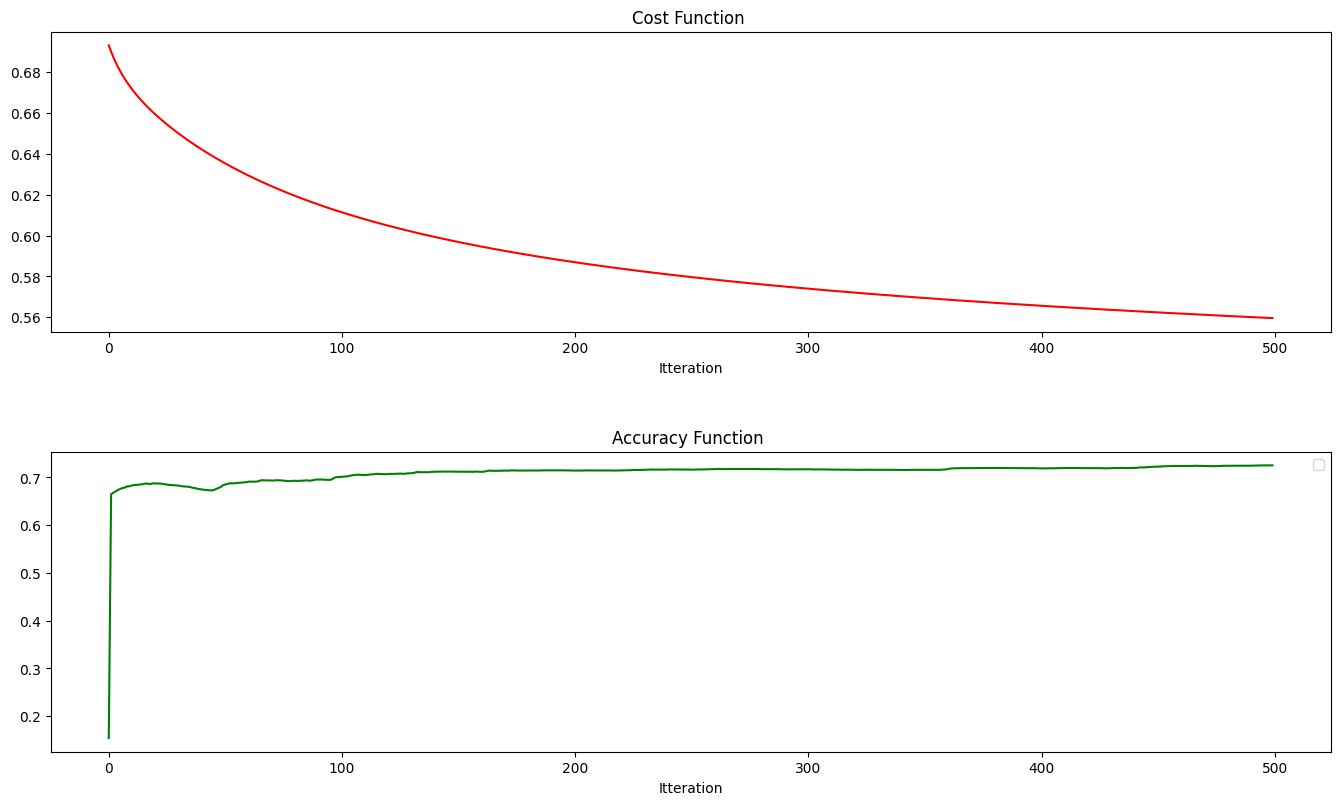

In [12]:
Model = logistic_regression(x_train,y_train,add_intercept=False)
cost, acc, Weights = Model.fit(learning_rate=0.01,iter=500)
print(Weights.shape)
plot_2D(cost,acc)

Training with intercept

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 167)


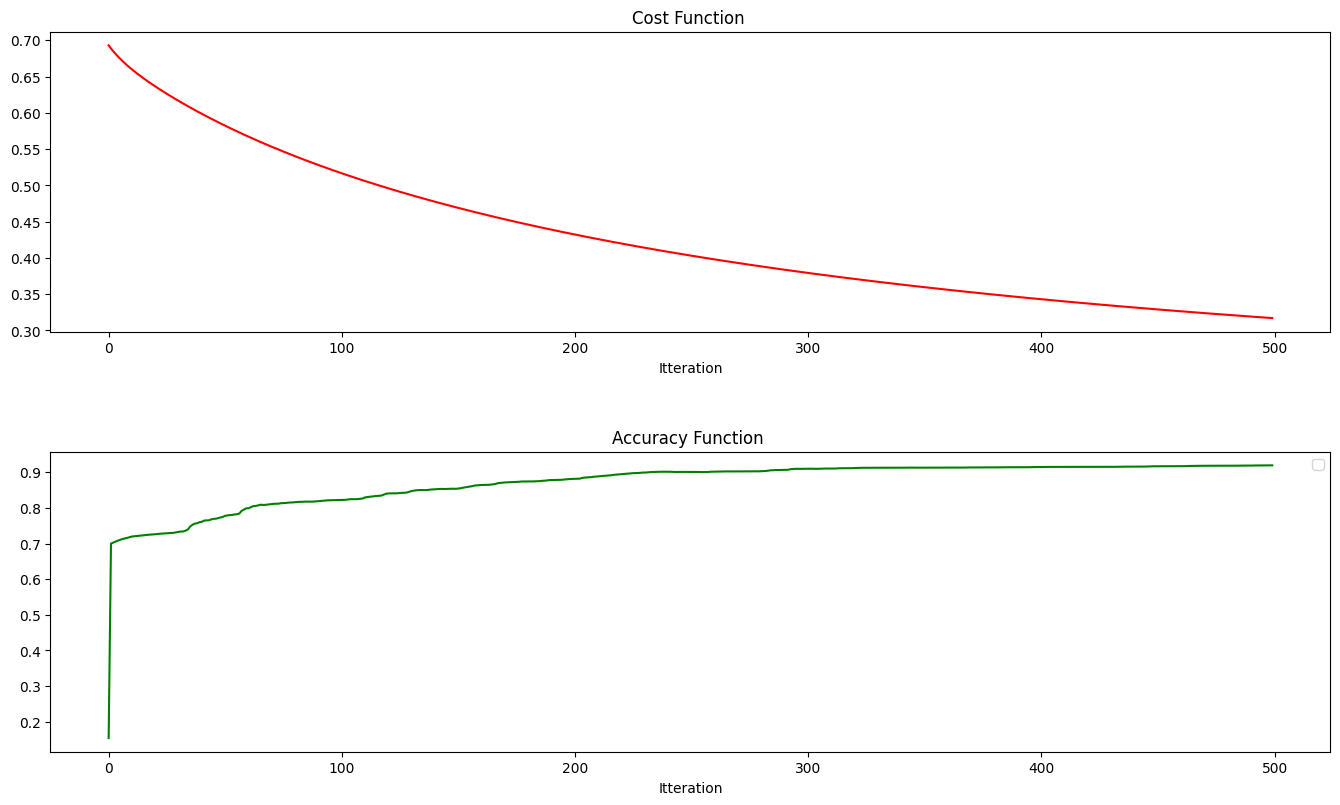

In [13]:
Model = logistic_regression(x_train,y_train,add_intercept=True)
cost, acc, Weights = Model.fit(learning_rate=0.01,iter=500)
print(Weights.shape)
plot_2D(cost,acc)

Accuracy of the model on the training set

In [14]:
y_pred = Model.predict(x_train)
result = Model.evaluation(y_train,y_pred)
print(f'Accuracy on training dataset: {result*100}%')

Accuracy on training dataset: 91.9369505910882%


Accuracy of the model on the test set

In [15]:
y_pred = Model.predict(x_test)
result = Model.evaluation(y_test,y_pred)
print(f'Accuracy on the test set: {result*100}%')

Accuracy on the test set: 70.37815126050421%


Training and testing the model with different learning rates

In [16]:
Alpha_parameter = [0.1, 0.01, 0.05, 0.001, 0.005, 0.0001,0.00001]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


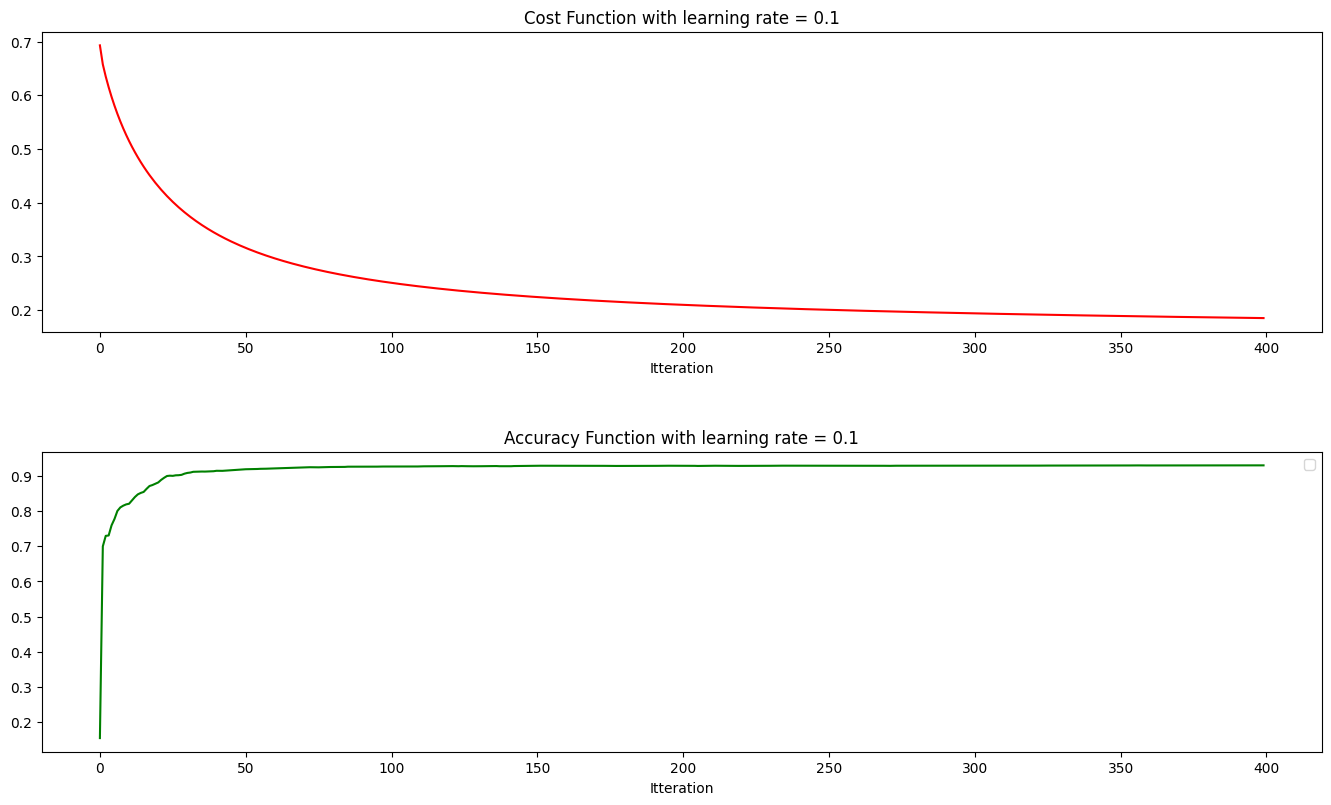

Accuracy on testing dataset: 73.10924369747899%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


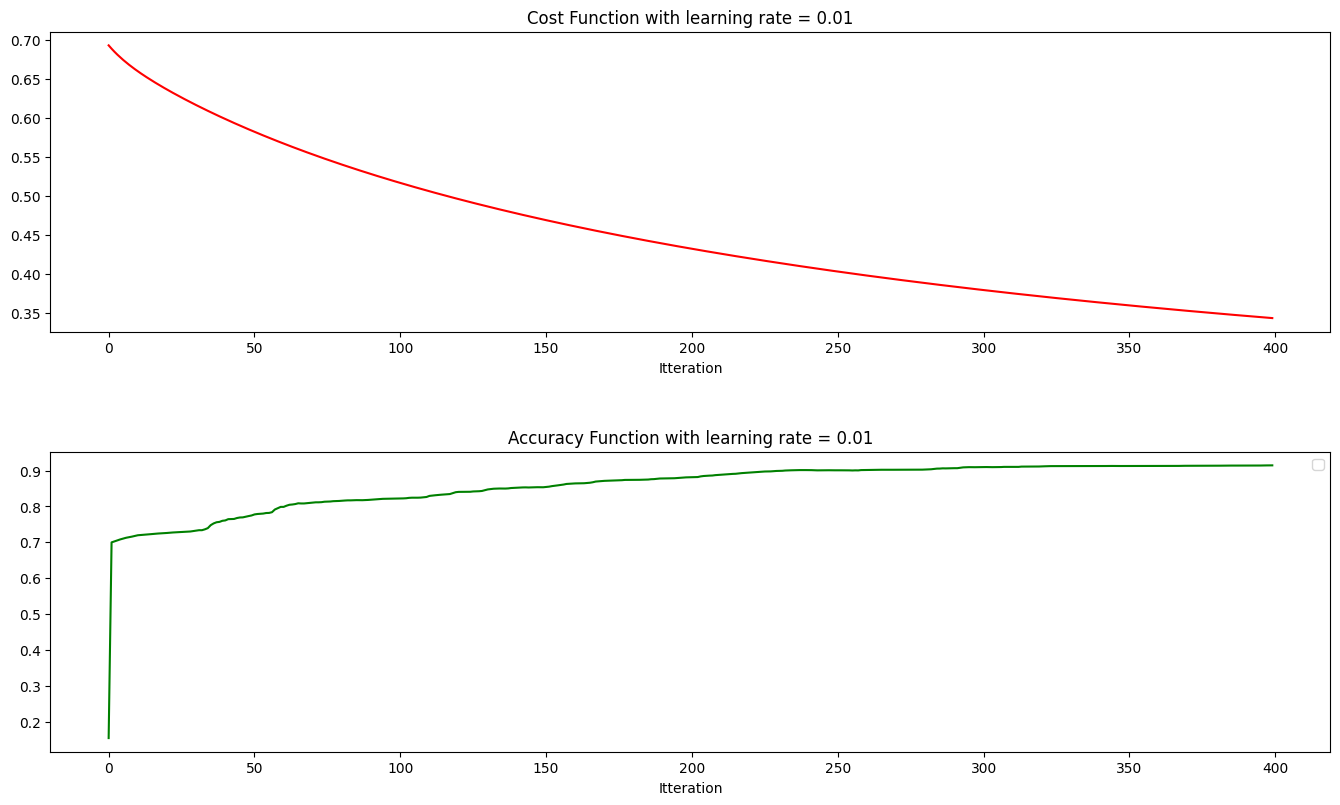

Accuracy on testing dataset: 70.37815126050421%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


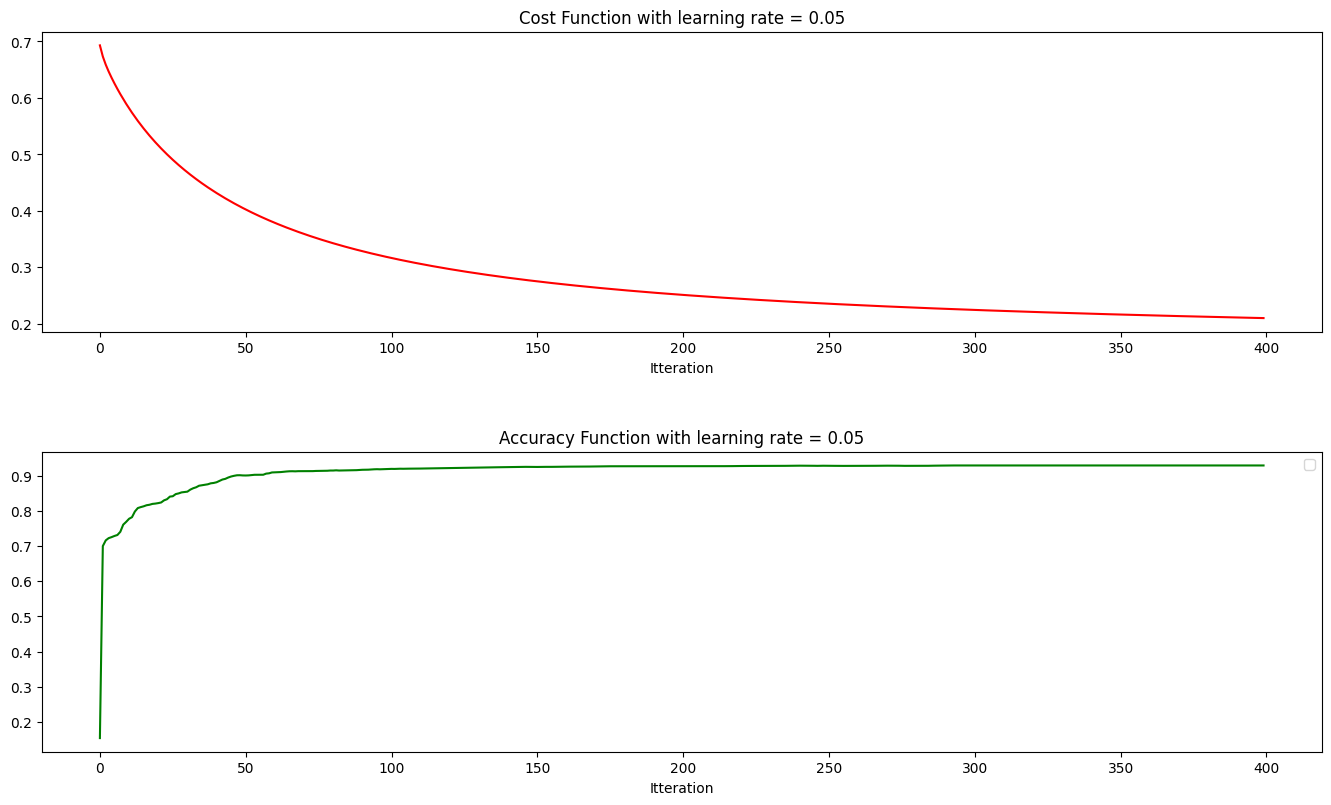

Accuracy on testing dataset: 72.26890756302521%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


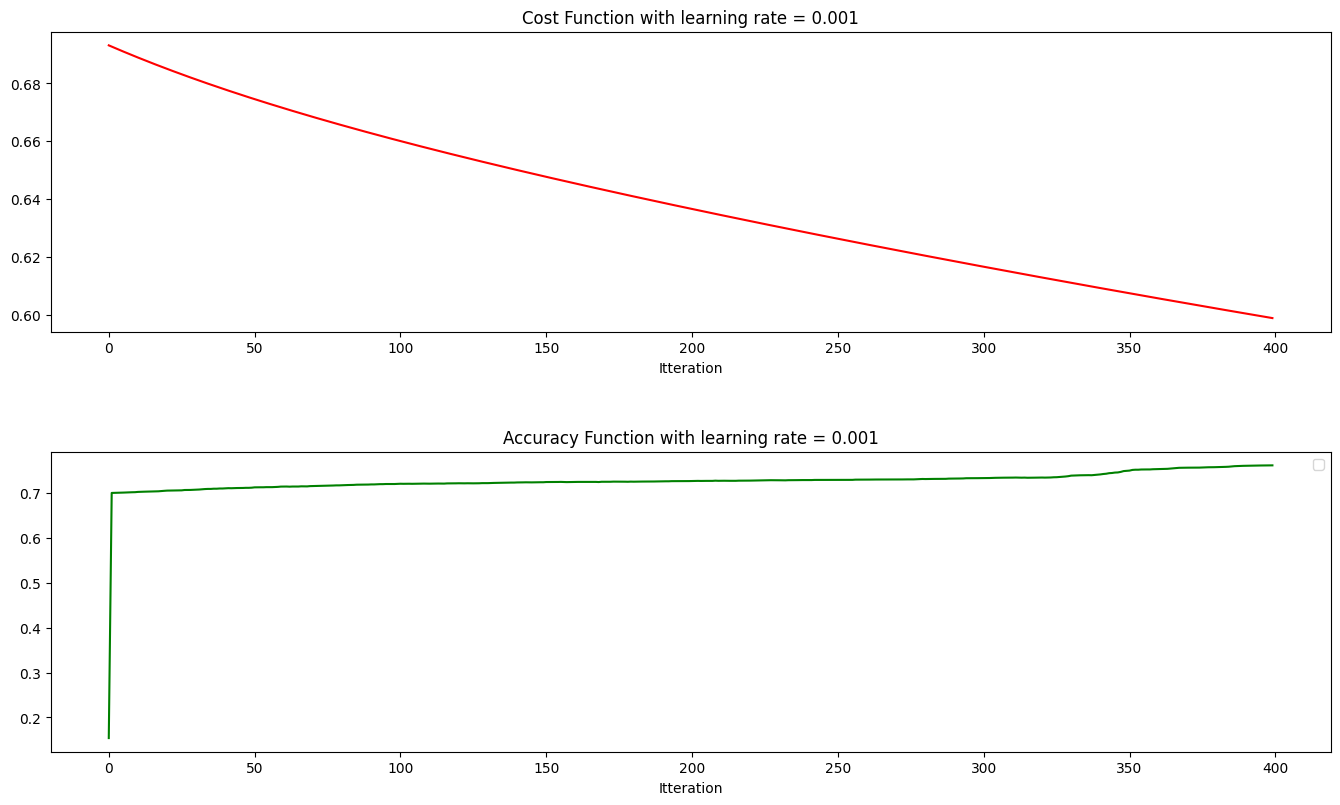

Accuracy on testing dataset: 63.86554621848739%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


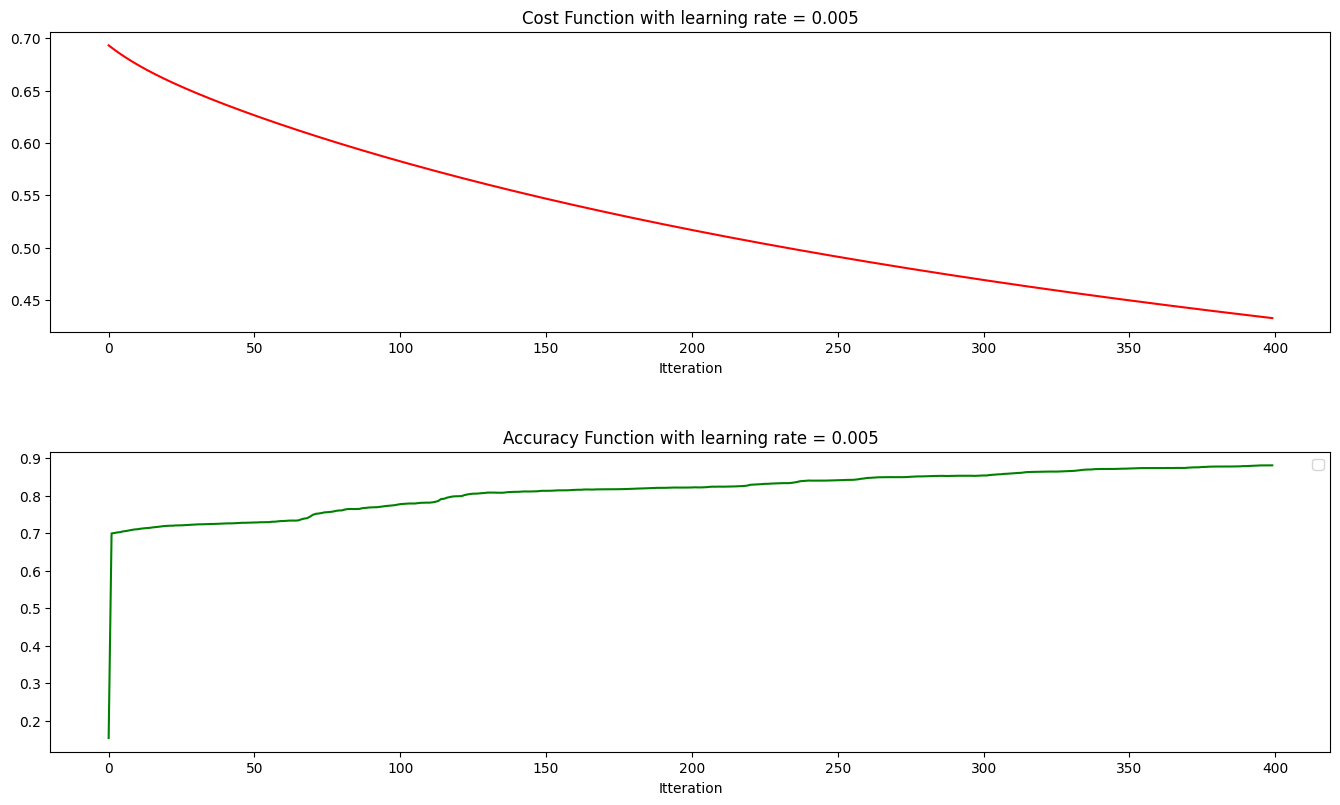

Accuracy on testing dataset: 69.74789915966386%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


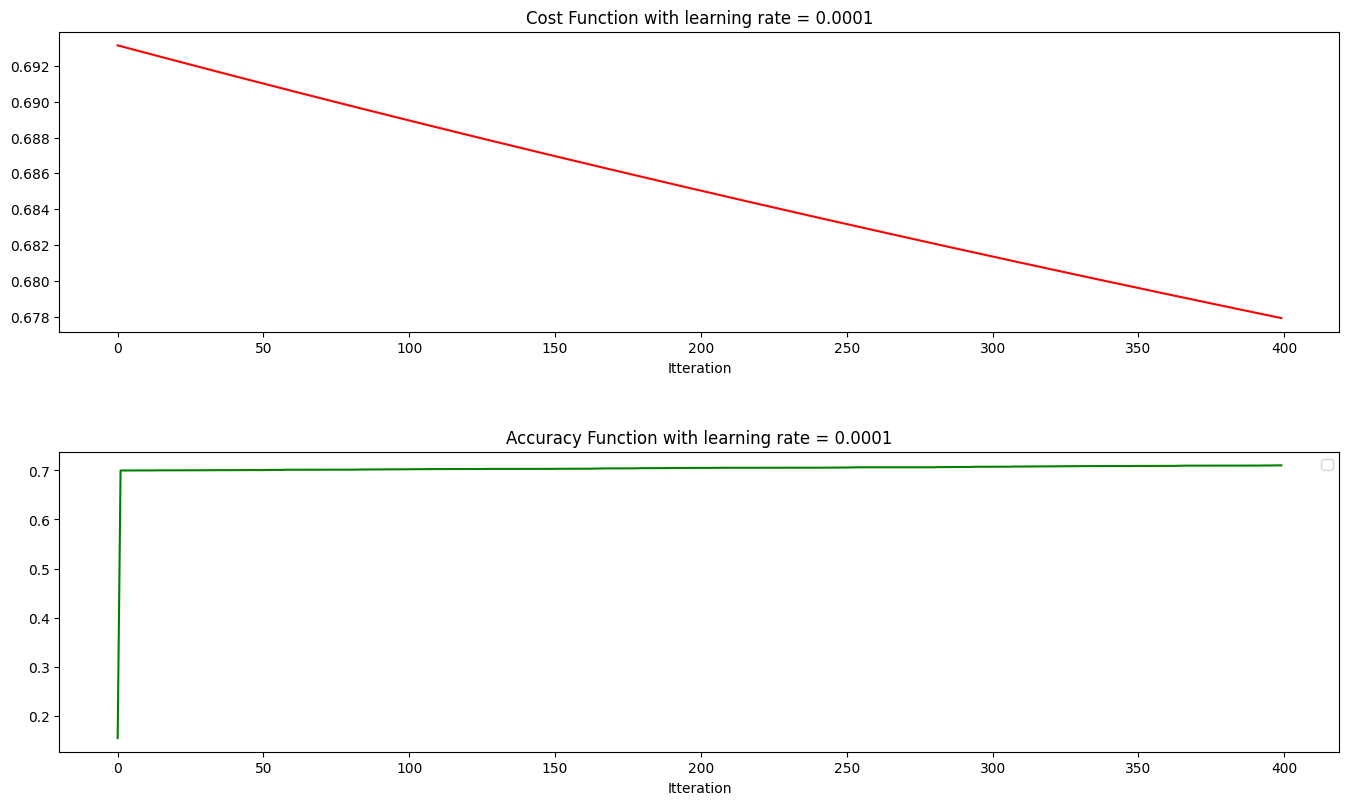

Accuracy on testing dataset: 62.81512605042017%


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


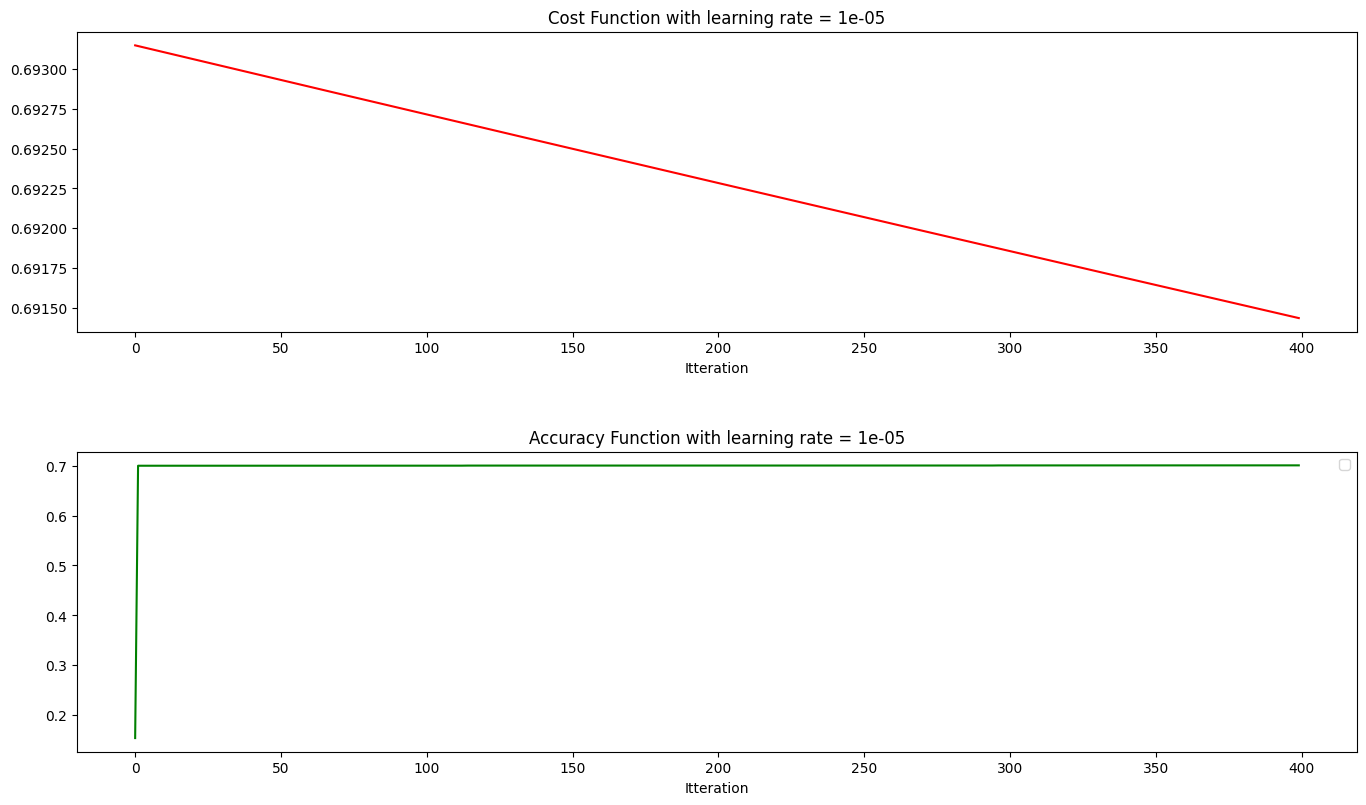

Accuracy on testing dataset: 62.60504201680672%


In [17]:
max_acc = 0.0
min_cost = 1000
for index, alpha in enumerate(Alpha_parameter):
    Model = logistic_regression(x_train,y_train)
    cost , acc,_ = Model.fit(learning_rate=alpha)
    plot_2D(cost,acc,title = f'with learning rate = {alpha}')
    max_acc = max(max(acc), max_acc)
    min_cost = min(min(cost), min_cost)
    print(evaluate_test(Model, x_test, y_test))
    

In [18]:
Model = logistic_regression(x_train,y_train)
cost, acc, Weights = Model.fit(learning_rate=0.005,iter=300)
y_pred = Model.predict(x_test)
result = Model.evaluation(y_test,y_pred)

Optional section Recall, Accuracy, and F1 Score

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:%.2f%%" % (accuracy * 100.0))

# Calculate the precision
precision = precision_score(y_test, y_pred)
print("Precision:%.2f%%" % (precision * 100.0))

# Calculate the recall
recall = recall_score(y_test, y_pred)
print("Recall:%.2f%%" % (recall * 100.0)) 

f1 = f1_score(y_test, y_pred)
print("F1-score:%.2f%%" % (f1 * 100.0))

Accuracy:68.91%
Precision:68.55%
Recall:52.66%
F1-score:59.56%


An Extra explanation has been provided in a report

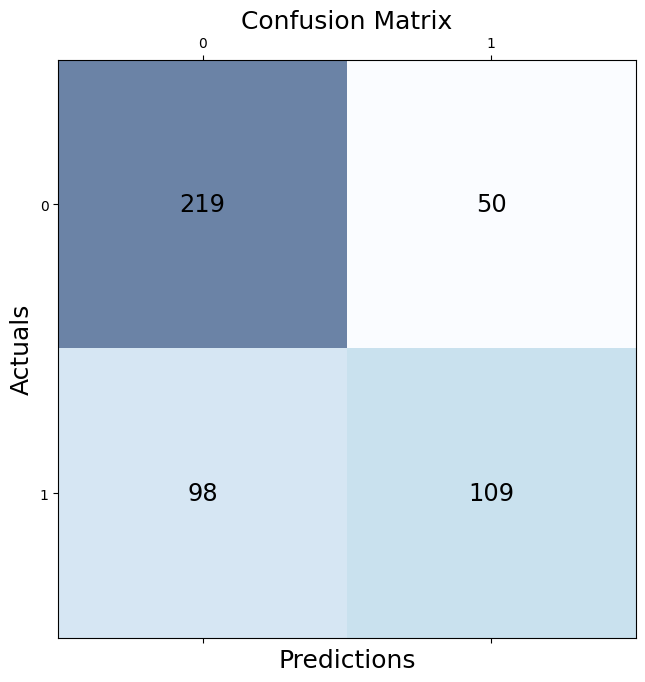

[[219  50]
 [ 98 109]]


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion(conf_matrix)
print(confusion_matrix(y_test, y_pred))